In [1]:
 #!pip install opendatasets

In [2]:
#Importing necessary modules that will enable us web scrap the document from the kaggle website
import requests
import os
import opendatasets as od

#Importing libary that will enable data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing necessary modules that help in modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

In [3]:
#running the url from kaggle
download_url = "https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/download?datasetVersionNumber=2"


In [4]:
#Downloading the datasets from kaggle
current_directory = os.getcwd()
file_name = download_url.split('/')[-2]
od.download(download_url)
print(f"\nThe file, {file_name}, has been downloaded into: {current_directory}")

Skipping, found downloaded files in ".\tmdb-movie-metadata" (use force=True to force download)

The file, tmdb-movie-metadata, has been downloaded into: C:\Users\CHUKWUNANUEKPERE\Bit_Bucket_Hamoye_Assignment


### Checking through the data to knowwhether the data is clean or not.

In [5]:
movies = pd.read_csv("tmdb_5000_movies.csv")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [9]:
movies.shape

(4803, 20)

In [10]:
#dropping the tagline column
movies.drop(["tagline"],axis= 1, inplace = True)
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


In [11]:
movies.shape

(4803, 19)

In [12]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [13]:
movies['vote_count'].value_counts()

0       62
1       53
2       46
4       43
3       41
        ..
648      1
5862     1
3583     1
1174     1
2078     1
Name: vote_count, Length: 1609, dtype: int64

## Data Visualization

<AxesSubplot:xlabel='budget', ylabel='genres'>

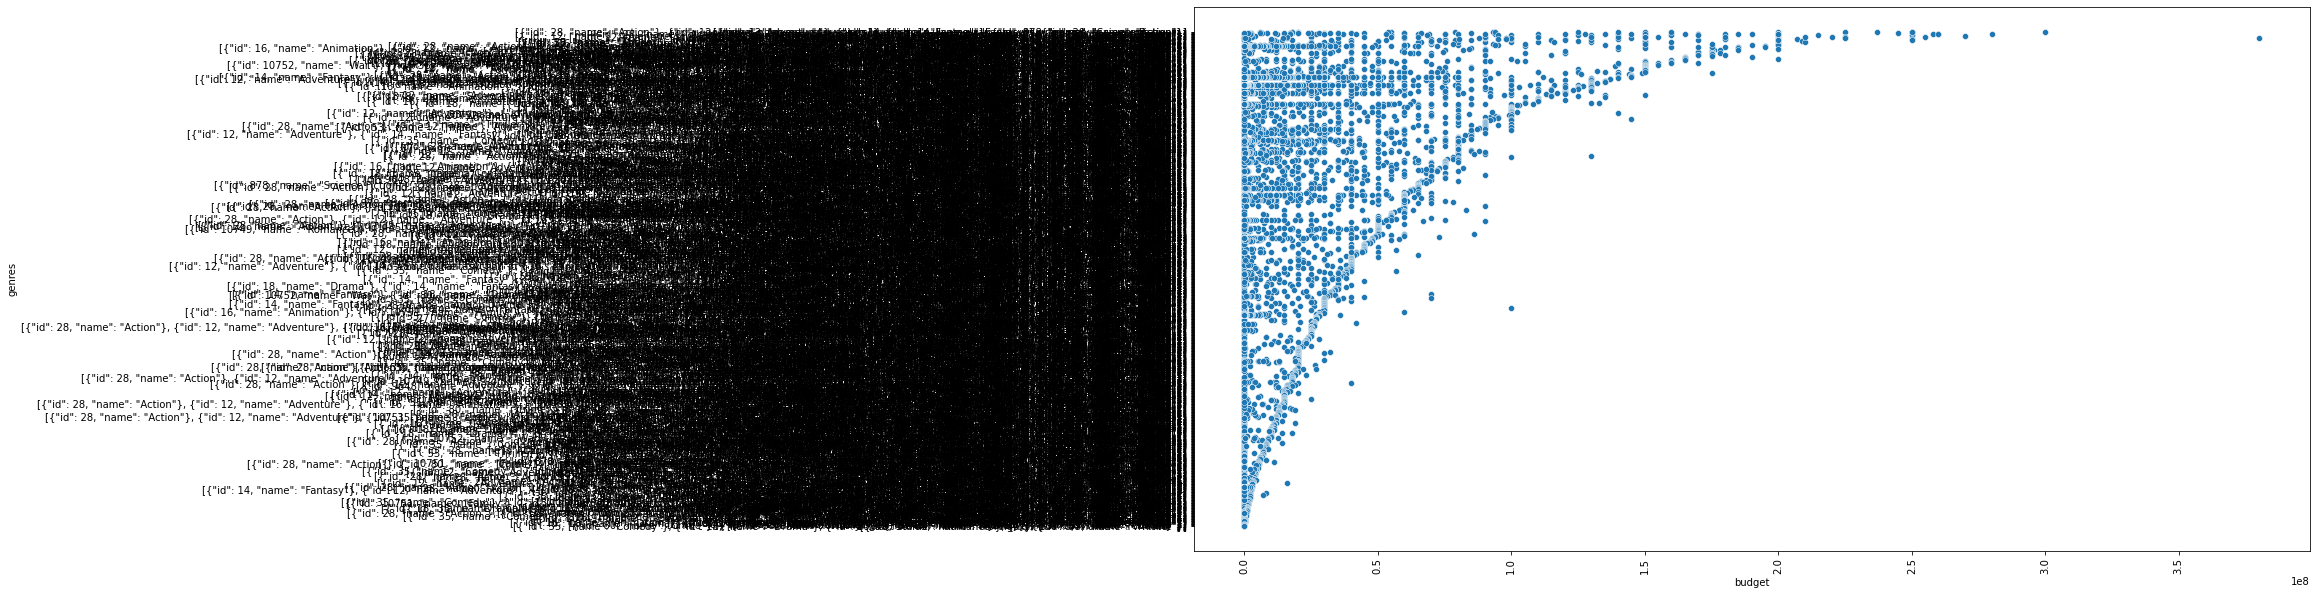

In [14]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
sns.scatterplot(x='budget',y='genres',data=movies)

<AxesSubplot:xlabel='genres', ylabel='revenue'>

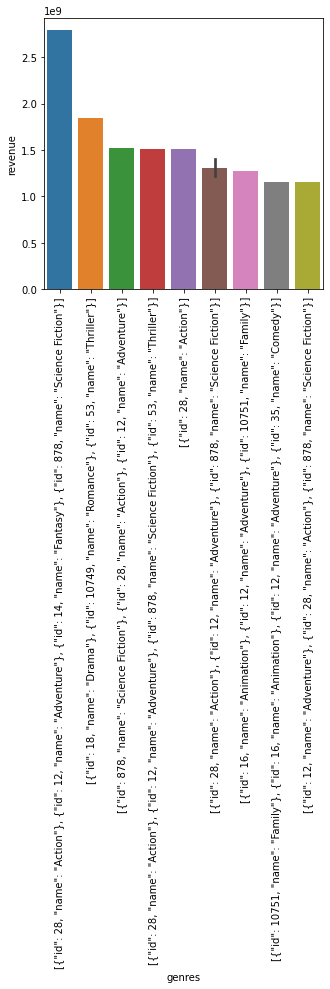

In [15]:
plt.figure (figsize=(5,5))
movies.sort_values('revenue', axis=0, ascending=False, inplace=True)
plt.xticks(rotation='vertical')
sns.barplot(x=movies['genres'][:10],y=movies['revenue'][:10],data=movies)

<AxesSubplot:xlabel='genres', ylabel='budget'>

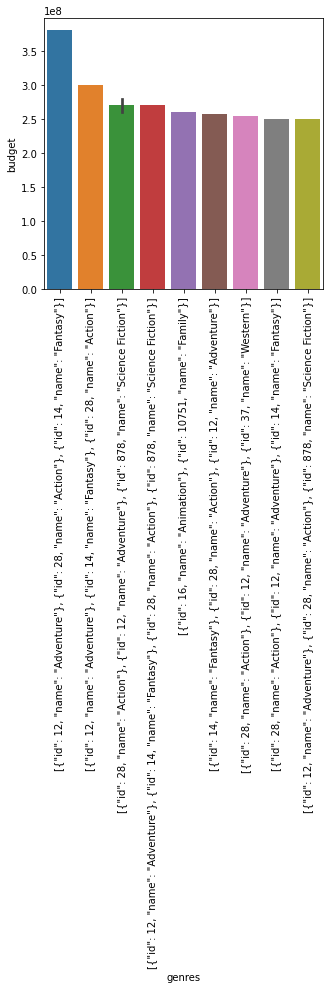

In [16]:
plt.figure (figsize=(5,5))
movies.sort_values('budget', axis=0, ascending=False, inplace=True)
plt.xticks(rotation='vertical')
sns.barplot(x=movies['genres'][:10],y=movies['budget'][:10],data=movies)

<AxesSubplot:xlabel='genres', ylabel='vote_average'>

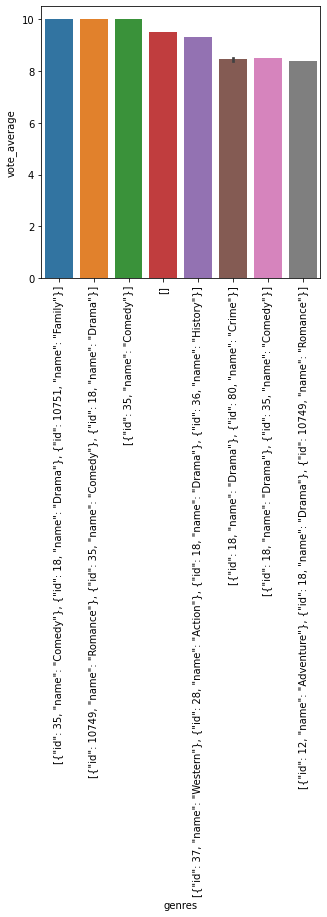

In [17]:
plt.figure (figsize=(5,5))
movies.sort_values('vote_average', axis=0, ascending=False, inplace=True)
plt.xticks(rotation='vertical')
sns.barplot(x=movies['genres'][:10],y=movies['vote_average'][:10],data=movies)

In [18]:
movies['profit']=movies['revenue']-movies['budget']
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,profit
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Dancer, Texas Pop. 81",10.0,1,565592
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,Me You and Five Bucks,10.0,2,-1
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Stiff Upper Lips,10.0,1,0
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,Little Big Top,10.0,1,0
3992,0,[],NaN,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0,0.0,[],Released,Sardaarji,9.5,2,0


In [19]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'profit'],
      dtype='object')

<AxesSubplot:xlabel='genres', ylabel='profit'>

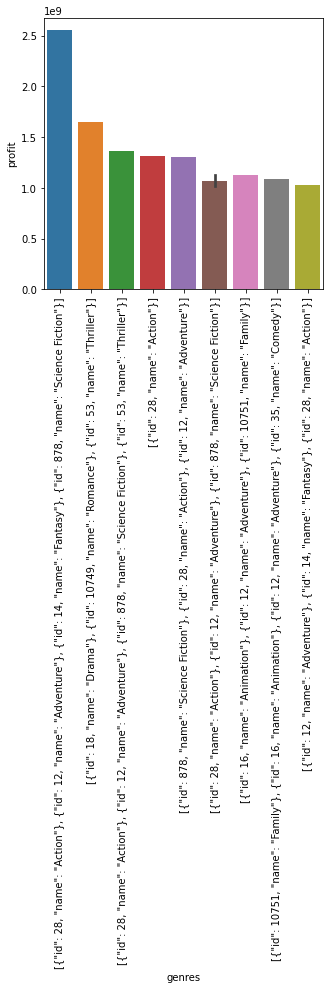

In [20]:
plt.figure (figsize=(5,5))
movies.sort_values('profit', axis=0, ascending=False, inplace=True)
plt.xticks(rotation='vertical')
sns.barplot(x=movies['genres'][:10],y=movies['profit'][:10],data=movies)

In [21]:
movies.iloc[0]

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [22]:
movies['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [23]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [24]:
credits = pd.read_csv('tmdb_5000_credits.csv')
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [25]:
credits.shape

(4803, 4)

In [26]:
credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [27]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [28]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [29]:
credits['cast']

0       [{"cast_id": 242, "character": "Jake Sully", "...
1       [{"cast_id": 4, "character": "Captain Jack Spa...
2       [{"cast_id": 1, "character": "James Bond", "cr...
3       [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4       [{"cast_id": 5, "character": "John Carter", "c...
                              ...                        
4798    [{"cast_id": 1, "character": "El Mariachi", "c...
4799    [{"cast_id": 1, "character": "Buzzy", "credit_...
4800    [{"cast_id": 8, "character": "Oliver O\u2019To...
4801    [{"cast_id": 3, "character": "Sam", "credit_id...
4802    [{"cast_id": 3, "character": "Herself", "credi...
Name: cast, Length: 4803, dtype: object

### Merging the two files together on the "title" column

In [30]:
metadata = movies.merge(credits, on='title')
metadata.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,title,vote_average,vote_count,profit,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2550965087,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Titanic,7.5,7562,1645034188,597,"[{""cast_id"": 20, ""character"": ""Rose DeWitt Buk...","[{""credit_id"": ""52fe425ac3a36847f8017985"", ""de..."
2,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Jurassic World,6.5,8662,1363528810,135397,"[{""cast_id"": 10, ""character"": ""Owen Grady"", ""c...","[{""credit_id"": ""52fe4bf7c3a368484e1a0683"", ""de..."
3,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Furious 7,7.3,4176,1316249360,168259,"[{""cast_id"": 17, ""character"": ""Dominic Toretto...","[{""credit_id"": ""52fe4cc8c3a36847f823e699"", ""de..."
4,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Avengers,7.4,11776,1299557910,24428,"[{""cast_id"": 46, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""52fe4495c3a368484e02b1cf"", ""de..."


In [31]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [32]:
metadata.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
profit                     0
movie_id                   0
cast                       0
crew                       0
dtype: int64

### Function to convert list of strings to list using names

In [33]:
import ast
def list_string(x):
    x = ast.literal_eval(x)
    list = []
    for i in x:
        list.append(i['name'])
    return list

### Function to convert list of strings to list to get director's name

In [34]:
def list_string2(x):
    x = ast.literal_eval(x)
    list = []
    for i in x:
        if i['job'] == 'Director':
            list.append(i['name'])
    return list

In [35]:
metadata['cast'] = metadata['cast'].apply(list_string)

In [36]:
metadata['crew'] = metadata['crew'].apply(list_string2)

In [37]:
metadata['genres'] = metadata['genres'].apply(list_string)

In [38]:
metadata['keywords'] = metadata['keywords'].apply(list_string)

In [39]:
metadata.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,title,vote_average,vote_count,profit,movie_id,cast,crew
1888,500000,"[Horror, Science Fiction]",NaN,30315,"[hotel, small town, siege, independent film, c...",en,Kingdom of the Spiders,Investigating the mysterious deaths of a numbe...,2.537032,"[{""name"": ""Arachnid Productions Ltd."", ""id"": 5...",...,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Kingdom of the Spiders,5.7,30,16500000,30315,"[William Shatner, Tiffany Bolling, Woody Strod...",[John 'Bud' Cardos]
4538,50000000,"[Crime, Drama, Mystery, Thriller]",NaN,9573,"[houseboat, heart, investigation, police, ex-c...",en,Blood Work,"Still recovering from a heart transplant, a re...",10.089065,"[{""name"": ""Malpaso Productions"", ""id"": 171}, {...",...,110.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Blood Work,6.1,206,-23800483,9573,"[Clint Eastwood, Jeff Daniels, Anjelica Huston...",[Clint Eastwood]
1154,45000000,"[Action, Crime, Drama, Thriller]",NaN,2034,"[police brutality, war on drugs, drug traffic,...",en,Training Day,On his first day on the job as a narcotics off...,52.081131,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Training Day,7.3,1634,59876233,2034,"[Denzel Washington, Ethan Hawke, Scott Glenn, ...",[Antoine Fuqua]
2330,3950000,"[Action, Drama, History]",NaN,22301,"[world war i, zeppelin, royal air force, royal...",en,Hell's Angels,Two brothers attending Oxford enlist with the ...,8.484123,"[{""name"": ""The Caddo Company"", ""id"": 13866}]",...,127.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Hell's Angels,6.1,19,4050000,22301,"[Ben Lyon, James Hall, Jean Harlow, John Darro...","[James Whale, Howard Hughes, Edmund Goulding]"
4039,7000000,"[Drama, Comedy, Music, Romance]",NaN,57825,"[indian lead, bollywood, modern day adaptation...",en,Bride & Prejudice,A Bollywood update of Jane Austen's classic ta...,12.150871,[],...,111.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Bride & Prejudice,6.5,110,-7000000,57825,"[Aishwarya Rai Bachchan, Martin Henderson, Nav...",[Gurinder Chadha]


In [40]:
metadata['cast']

0       [Sam Worthington, Zoe Saldana, Sigourney Weave...
1       [Kate Winslet, Leonardo DiCaprio, Frances Fish...
2       [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...
3       [Vin Diesel, Paul Walker, Dwayne Johnson, Mich...
4       [Robert Downey Jr., Chris Evans, Mark Ruffalo,...
                              ...                        
4804    [Chow Yun-fat, Justin Chatwin, Joon Park, Jami...
4805    [Seth Green, Joan Cusack, Dan Fogler, Breckin ...
4806    [Dennis Quaid, Billy Bob Thornton, Jason Patri...
4807    [Benicio del Toro, Anthony Hopkins, Emily Blun...
4808    [Johnny Depp, Armie Hammer, William Fichtner, ...
Name: cast, Length: 4809, dtype: object

In [41]:
metadata['crew']

0          [James Cameron]
1          [James Cameron]
2        [Colin Trevorrow]
3              [James Wan]
4            [Joss Whedon]
               ...        
4804          [James Wong]
4805         [Simon Wells]
4806    [John Lee Hancock]
4807        [Joe Johnston]
4808      [Gore Verbinski]
Name: crew, Length: 4809, dtype: object

### Function to remove whitespaces

In [42]:
def remove_whitespace(x):
    list = []
    for i in x:
        list.append(i.replace(' ',''))
    return list

In [43]:
metadata['cast'] = metadata['cast'].apply(remove_whitespace)
metadata['crew'] = metadata['crew'].apply(remove_whitespace)
metadata['genres'] = metadata['genres'].apply(remove_whitespace)

In [44]:
metadata['cast']

0       [SamWorthington, ZoeSaldana, SigourneyWeaver, ...
1       [KateWinslet, LeonardoDiCaprio, FrancesFisher,...
2       [ChrisPratt, BryceDallasHoward, IrrfanKhan, Vi...
3       [VinDiesel, PaulWalker, DwayneJohnson, Michell...
4       [RobertDowneyJr., ChrisEvans, MarkRuffalo, Chr...
                              ...                        
4804    [ChowYun-fat, JustinChatwin, JoonPark, JamieCh...
4805    [SethGreen, JoanCusack, DanFogler, BreckinMeye...
4806    [DennisQuaid, BillyBobThornton, JasonPatric, P...
4807    [BeniciodelToro, AnthonyHopkins, EmilyBlunt, H...
4808    [JohnnyDepp, ArmieHammer, WilliamFichtner, Hel...
Name: cast, Length: 4809, dtype: object

In [45]:
metadata['genres']

0            [Action, Adventure, Fantasy, ScienceFiction]
1                              [Drama, Romance, Thriller]
2           [Action, Adventure, ScienceFiction, Thriller]
3                                                [Action]
4                     [ScienceFiction, Action, Adventure]
                              ...                        
4804    [Action, Adventure, Fantasy, ScienceFiction, T...
4805                       [Adventure, Animation, Family]
4806                              [Western, History, War]
4807                            [Drama, Horror, Thriller]
4808                         [Action, Adventure, Western]
Name: genres, Length: 4809, dtype: object

In [46]:
metadata['crew']

0         [JamesCameron]
1         [JamesCameron]
2       [ColinTrevorrow]
3             [JamesWan]
4           [JossWhedon]
              ...       
4804         [JamesWong]
4805        [SimonWells]
4806    [JohnLeeHancock]
4807       [JoeJohnston]
4808     [GoreVerbinski]
Name: crew, Length: 4809, dtype: object

In [47]:
# only using the first three casts
metadata['cast'] = metadata['cast'].apply(lambda i: i[0:3])
metadata['cast']

0        [SamWorthington, ZoeSaldana, SigourneyWeaver]
1       [KateWinslet, LeonardoDiCaprio, FrancesFisher]
2          [ChrisPratt, BryceDallasHoward, IrrfanKhan]
3               [VinDiesel, PaulWalker, DwayneJohnson]
4           [RobertDowneyJr., ChrisEvans, MarkRuffalo]
                             ...                      
4804            [ChowYun-fat, JustinChatwin, JoonPark]
4805                [SethGreen, JoanCusack, DanFogler]
4806      [DennisQuaid, BillyBobThornton, JasonPatric]
4807      [BeniciodelToro, AnthonyHopkins, EmilyBlunt]
4808        [JohnnyDepp, ArmieHammer, WilliamFichtner]
Name: cast, Length: 4809, dtype: object

- We are going to be using few of the features relevant to the solution of our problem

In [48]:
final_df = pd.DataFrame(metadata, columns=['id','title','homepage','cast','crew','overview','genres','keywords'])
final_df.head()

,id,title,homepage,cast,crew,overview,genres,keywords
0,19995,Avatar,http://www.avatarmovie.com/,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[culture clash, future, space war, space colon..."
1,597,Titanic,http://www.titanicmovie.com,"[KateWinslet, LeonardoDiCaprio, FrancesFisher]",[JamesCameron],"84 years later, a 101-year-old woman named Ros...","[Drama, Romance, Thriller]","[shipwreck, iceberg, ship, panic, titanic, oce..."
2,135397,Jurassic World,http://www.jurassicworld.com/,"[ChrisPratt, BryceDallasHoward, IrrfanKhan]",[ColinTrevorrow],Twenty-two years after the events of Jurassic ...,"[Action, Adventure, ScienceFiction, Thriller]","[monster, dna, tyrannosaurus rex, velociraptor..."
3,168259,Furious 7,http://www.furious7.com/,"[VinDiesel, PaulWalker, DwayneJohnson]",[JamesWan],Deckard Shaw seeks revenge against Dominic Tor...,[Action],"[car race, speed, revenge, suspense, car, race..."
4,24428,The Avengers,http://marvel.com/avengers_movie/,"[RobertDowneyJr., ChrisEvans, MarkRuffalo]",[JossWhedon],When an unexpected enemy emerges and threatens...,"[ScienceFiction, Action, Adventure]","[new york, shield, marvel comic, superhero, ba..."


In [49]:
final_df.isnull().sum()

id             0
title          0
homepage    3096
cast           0
crew           0
overview       3
genres         0
keywords       0
dtype: int64

In [50]:
# final_df["url"] = 0
# for i in range(len(url)):
#     if final_df['homepage'][i] == 0:
#         url = ("{} + {}".format("https://www.",("".join(list(final_df.loc["title",url[i][0]].split())))))
#         final_df['url'][i] = url
#     else:
#         final_df["url"][i] = final_df["homepage"][i]

In [51]:
# converting strings into list of strings
def split(text):
    text = str(text).split()
    return text

In [52]:
final_df['overview'] = final_df['overview'].apply(split)

In [53]:
final_df['feature'] = final_df['overview'] + final_df['genres'] + final_df['keywords'] + final_df['cast'] + final_df['crew']

In [54]:
final_df.drop(columns=['overview','genres','keywords','cast','crew'], inplace=True)

In [55]:
final_df.head()

,id,title,homepage,feature
0,19995,Avatar,http://www.avatarmovie.com/,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,597,Titanic,http://www.titanicmovie.com,"[84, years, later,, a, 101-year-old, woman, na..."
2,135397,Jurassic World,http://www.jurassicworld.com/,"[Twenty-two, years, after, the, events, of, Ju..."
3,168259,Furious 7,http://www.furious7.com/,"[Deckard, Shaw, seeks, revenge, against, Domin..."
4,24428,The Avengers,http://marvel.com/avengers_movie/,"[When, an, unexpected, enemy, emerges, and, th..."


In [56]:
# convert the feature column to lower case
def lower(x):
    list = []
    for i in x:
        list.append(i.lower())
    return list

In [57]:
final_df['feature'] = final_df['feature'].apply(lower)

In [58]:
final_df

,id,title,homepage,feature
0,19995,Avatar,http://www.avatarmovie.com/,"[in, the, 22nd, century,, a, paraplegic, marin..."
1,597,Titanic,http://www.titanicmovie.com,"[84, years, later,, a, 101-year-old, woman, na..."
2,135397,Jurassic World,http://www.jurassicworld.com/,"[twenty-two, years, after, the, events, of, ju..."
3,168259,Furious 7,http://www.furious7.com/,"[deckard, shaw, seeks, revenge, against, domin..."
4,24428,The Avengers,http://marvel.com/avengers_movie/,"[when, an, unexpected, enemy, emerges, and, th..."
...,...,...,...,...
4804,14164,Dragonball Evolution,NaN,"[the, young, warrior, son, goku, sets, out, on..."
4805,50321,Mars Needs Moms,http://disney.go.com/disneypictures/marsneedsm...,"[when, martians, suddenly, abduct, his, mom,, ..."
4806,10733,The Alamo,NaN,"[based, on, the, 1836, standoff, between, a, g..."
4807,7978,The Wolfman,http://www.thewolfmanmovie.com/,"[lawrence, talbot,, an, american, man, on, a, ..."


In [59]:
#!pip install nltk

In [60]:
import nltk
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [61]:
def stem(text):
    list = []
    for i in text:
        list.append(porter.stem(i))
    return list 

In [62]:
final_df['feature'] = final_df['feature'].apply(stem)

In [63]:
final_df.sample(5)

,id,title,homepage,feature
1993,31175,Soul Kitchen,http://www.soul-kitchen-film.com/?l=en,"[soul, kitchen, film, center, on, a, likabl, b..."
1946,32275,Duel in the Sun,NaN,"[beauti, half-bre, pearl, chavez, becom, the, ..."
3014,170480,The Deported,https://www.facebook.com/pages/The-Deported/46...,"[an, italian-american, actor, is, deport, to, ..."
3958,82532,"Jeff, Who Lives at Home",NaN,"[dispatch, from, hi, basement, room, on, an, e..."
4158,60309,The Conspirator,http://www.conspiratorthemovie.com/,"[mari, surratt, is, the, lone, femal, charg, a..."


In [64]:
# removing the spaces
final_df['feature'] = final_df['feature'].apply(remove_whitespace)

In [65]:
final_df['feature'].head()

0    [in, the, 22nd, century,, a, parapleg, marin, ...
1    [84, year, later,, a, 101-year-old, woman, nam...
2    [twenty-two, year, after, the, event, of, jura...
3    [deckard, shaw, seek, reveng, against, domin, ...
4    [when, an, unexpect, enemi, emerg, and, threat...
Name: feature, dtype: object

In [66]:
final_df['feature'] = final_df['feature'].apply(lambda x: " ".join(x))

In [67]:
final_df['feature'].head()

0    in the 22nd century, a parapleg marin is dispa...
1    84 year later, a 101-year-old woman name rose ...
2    twenty-two year after the event of jurass park...
3    deckard shaw seek reveng against domin toretto...
4    when an unexpect enemi emerg and threaten glob...
Name: feature, dtype: object

### Vectorization

In [68]:
# creating a count vectorizer object
cv = CountVectorizer(stop_words='english')

In [69]:
# creating a data matrix from the overviews
X = cv.fit_transform(final_df['feature']).toarray()

In [70]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
scores = cosine_similarity(X)
scores

array([[1.        , 0.0375882 , 0.08247861, ..., 0.        , 0.        ,
        0.03344033],
       [0.0375882 , 1.        , 0.06329621, ..., 0.        , 0.04512426,
        0.        ],
       [0.08247861, 0.06329621, 1.        , ..., 0.        , 0.02475369,
        0.0506803 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.07696578],
       [0.        , 0.04512426, 0.02475369, ..., 0.        , 1.        ,
        0.02007239],
       [0.03344033, 0.        , 0.0506803 , ..., 0.07696578, 0.02007239,
        1.        ]])

In [72]:
final_df[final_df['title'] == 'Avatar'].index[0]

0

In [73]:
def recommend_movie(movie):
    index = final_df[final_df['title'] == movie].index[0]
    distance = sorted(list(enumerate(scores[index])),reverse=True,key=lambda i: i[1])
    for i in distance[1:9]:
        print('{} {}'.format(final_df.iloc[i[0]].title, final_df.iloc[i[0]].homepage))

In [74]:
recommend_movie("Avatar")

Aliens nan
Aliens vs Predator: Requiem http://www.avp-r.com/
Titan A.E. nan
Independence Day nan
Battle: Los Angeles http://www.battlela.com
Meet Dave http://www.meetdavemovie.com/
Predators nan
Falcon Rising nan


In [75]:
recommend_movie('Scream 3')

Scream nan
Scream 2 nan
Mirrors nan
Sorority Row nan
Scream 4 http://www.scream-4.com/
Disaster Movie http://www.disastermovie.net/
2:13 nan
Friday the 13th: A New Beginning nan


In [76]:
recommend_movie('Batman')

Batman nan
Batman & Robin nan
The R.M. http://www.halestormentertainment.com/p_movies_details.asp?mID=jnlppmp8
Batman Begins http://www2.warnerbros.com/batmanbegins/index.html
Batman Returns nan
The Dark Knight http://thedarkknight.warnerbros.com/dvdsite/
The Dark Knight Rises http://www.thedarkknightrises.com/
Code of Honor nan
